# Задание 1
Студенты проходили тестирование по финансовой грамотности, результаты измерялись до прохождения курса по управлению финансами и после. В выборке представлены их результаты.

Требуется:
Определить, изменились ли в среднем результаты тестирования при прохождении курса.
Определить размер эффекта по Cohen's d.

demidova.ua@phystech.edu

### Загрузка данных

In [5]:
import pandas as pd
import numpy as np

In [13]:
f = open('students.txt')

In [14]:
data = []
for line in f:
    data.append(line.split())

In [15]:
data = pd.DataFrame(data[1:-1], columns = data[0])

In [16]:
data

,Time,Student,Score
0,Before,a,65
1,Before,b,75
2,Before,c,86
3,Before,d,69
4,Before,e,60
5,Before,f,81
6,Before,g,88
7,Before,h,53
8,Before,i,75
9,Before,j,73


In [17]:
f.close()

In [18]:
from matplotlib import pyplot as plt

In [19]:
score_before = data['Score'].values[:10].astype(int)
score_after = data['Score'].values[10:].astype(int)

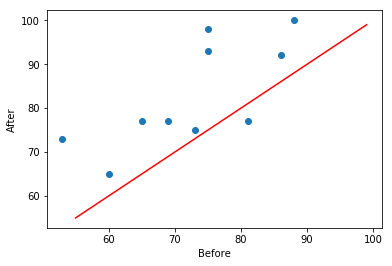

In [20]:
plt.scatter(score_before, score_after)
plt.xlabel('Before')
plt.ylabel('After')
x = range(55,100)
y = range(55,100)
plt.plot(x,y, 'r')
plt.show()

### Выбор критерия

Можно бы было воспользоваться t-критерием Стьюдента для связанных выборок. Но данные выборки слишком малы, чтобы проверять их на нормальность, так как любой критерий может пропустить отклонения от нормальности, а графические методы (например q-q plot) будут бесполезны.

Критерий знаков

In [21]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(score_before, score_after)

(-4.0, 0.021484374999999997)

Критерий знаковых рангов Уилкоксона для связанных выборок:  

In [23]:
from scipy import stats as st
st.wilcoxon(score_before, score_after)

WilcoxonResult(statistic=2.0, pvalue=0.00929822320829811)

Перестановоный критерий:

In [24]:
from permute.core import one_sample
one_sample(score_after - score_before, alternative='greater')

(0.00301, 10.2)

### Вывод:

Все три критерия отвергают гипотезу о том, что результаты после прохождения теста не изменились, на уровне значимости $\alpha$ = 0.05.

### Размер эффекта по Cohen's d

In [25]:
mean_before = np.mean(score_before)
mean_after = np.mean(score_after)
s1_square = np.std(score_before, ddof=1)**2
s2_square = np.std(score_after, ddof=1)**2
s = np.sqrt((9*s1_square+9*s2_square)/18)
d = (mean_after-mean_before)/s
d

0.8828678212381178

Исходя из таблицы https://en.wikipedia.org/wiki/Effect_size#Cohen's_d получаем Large effect size.